In [ ]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

In [11]:
from autoencodix.utils.example_data import (
    EXAMPLE_MULTI_BULK,
    EXAMPLE_MULTI_SC,
    EXAMPLE_PROCESSED_DATA,
)

# EXAMPLE_DATA hold PyTorch Datasets (child with extra info) with metdata for train, test and valid splits
processed_data = EXAMPLE_PROCESSED_DATA
raw_bulk = EXAMPLE_MULTI_BULK
raw_sc = EXAMPLE_MULTI_SC

In [12]:
EXAMPLE_PROCESSED_DATA.train.metadata

,cluster,age,size,density,category,random_feature,sample_id
sample_303,Cluster_1,21.194224,4.538300,0.113699,A,-0.657083,sample_303
sample_259,Cluster_1,23.930016,6.864434,0.086318,A,1.280058,sample_259
sample_717,Cluster_4,53.074559,12.812042,1.111816,D,-0.046288,sample_717
sample_127,Cluster_5,53.380117,12.875572,0.525779,C,0.578705,sample_127
sample_576,Cluster_1,33.724569,2.429471,0.038608,B,0.657419,sample_576
...,...,...,...,...,...,...,...
sample_578,Cluster_1,28.165998,6.223125,0.286763,E,0.047880,sample_578
sample_946,Cluster_2,31.830988,4.929979,0.456122,B,0.126054,sample_946
sample_284,Cluster_3,40.607502,6.923138,2.313312,B,-0.288755,sample_284
sample_462,Cluster_1,40.449944,0.831899,0.096780,C,1.070726,sample_462


In [13]:
import autoencodix as acx
from autoencodix.configs.default_config import DefaultConfig

In [ ]:
vanillix = acx.Vanillix(config=DefaultConfig(epochs=20, learning_rate=0.005,n_layers=1, latent_dim=2, checkpoint_interval=5), data=processed_data)
vanillix.run()
vanillix.show_result()

In [ ]:
vanillix._visualizer.show_latent_space(result=vanillix.result,plot_type="2D-scatter", param=["cluster"])

In [ ]:
vanillix.result.model

## Ontix

In [14]:
import autoencodix as acx
from autoencodix.configs.default_config import DefaultConfig
from autoencodix.configs.ontix_config import OntixConfig

from autoencodix.utils.example_data import (
    EXAMPLE_PROCESSED_DATA,
)

# EXAMPLE_DATA hold PyTorch Datasets (child with extra info) with metdata for train, test and valid splits
processed_data = EXAMPLE_PROCESSED_DATA


In [15]:

ont_lvl1 = dict()
ont_lvl2 = dict()

ont_lvl1["pwy-1"] = ["sub-pwy-1", "sub-pwy-2"]
ont_lvl1["pwy-2"] = ["sub-pwy-2"]
ont_lvl1["pwy-3"] = ["sub-pwy-1", "sub-pwy-3"]
# first third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-1"] = processed_data.train.feature_ids[: int(len(processed_data.train.feature_ids) / 3)]
# second third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-2"] = processed_data.train.feature_ids[
	int(len(processed_data.train.feature_ids) / 3) : int(2 * len(processed_data.train.feature_ids) / 3)
]
# last third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-3"] = processed_data.train.feature_ids[
	int(2 * len(processed_data.train.feature_ids) / 3) : int(len(processed_data.train.feature_ids))
]

# ont_lvl2["sub-pwy-1"] = ["gene-1", "gene-2"]
# ont_lvl2["sub-pwy-2"] = ["gene-3", "gene-4"]
# ont_lvl2["sub-pwy-3"] = ["gene-2", "gene-6"]

ontology_tuple = ( ont_lvl1, ont_lvl2 )


In [26]:
ontology_tuple[1]

{'sub-pwy-1': ['feature_0',
  'feature_1',
  'feature_2',
  'feature_3',
  'feature_4',
  'feature_5',
  'feature_6',
  'feature_7',
  'feature_8',
  'feature_9'],
 'sub-pwy-2': ['feature_10',
  'feature_11',
  'feature_12',
  'feature_13',
  'feature_14',
  'feature_15',
  'feature_16',
  'feature_17',
  'feature_18',
  'feature_19'],
 'sub-pwy-3': ['feature_20',
  'feature_21',
  'feature_22',
  'feature_23',
  'feature_24',
  'feature_25',
  'feature_26',
  'feature_27',
  'feature_28',
  'feature_29']}

In [19]:
# Write each dictionary in ontology_tuple to a separate text file
for i, ont_dict in enumerate(ontology_tuple):
	file_name = f"ontology_level_{i+1}.txt"
	with open(file_name, "w") as f:
		for key, values in ont_dict.items():
			for value in values:
				f.write(f"{value}\t{key}\n")
print("Ontology dictionaries written to ontology_level_1.txt and ontology_level_2.txt")

Ontology dictionaries written to ontology_level_1.txt and ontology_level_2.txt


In [ ]:
ont =

In [20]:
ont_files = ["ontology_level_1.txt", "ontology_level_2.txt"]

In [24]:
import pandas as pd
ont = pd.read_csv(ont_files[1], sep="\t")
ont

,feature_0,sub-pwy-1
0,feature_1,sub-pwy-1
1,feature_2,sub-pwy-1
2,feature_3,sub-pwy-1
3,feature_4,sub-pwy-1
4,feature_5,sub-pwy-1
5,feature_6,sub-pwy-1
6,feature_7,sub-pwy-1
7,feature_8,sub-pwy-1
8,feature_9,sub-pwy-1
9,feature_10,sub-pwy-2


In [5]:
ontix = acx.Ontix(ontologies=ont_files, sep="\t", config=OntixConfig(epochs=5, learning_rate=0.005,n_layers=1, save_memory=True), data=processed_data)
# ontix = acx.Ontix(ontologies=ontology_tuple, config=DefaultConfig(epochs=500, learning_rate=0.005,n_layers=1), user_data=processed_data)

In [6]:
ontix.run()

Ontix checks:
All possible feature names length: 30
Feature order length: 30
Feature names without filtering: 30
Mask layer 0 with shape torch.Size([3, 3]) and 5.0 connections
Mask layer 1 with shape torch.Size([30, 3]) and 30.0 connections
Latent Dim: 3
Epoch 1 - Train Loss: 1226.8656
Sub-losses: recon_loss: 1226.8654, var_loss: 0.0001, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 1211.3591
Sub-losses: recon_loss: 1211.3589, var_loss: 0.0001, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 1203.4076
Sub-losses: recon_loss: 1203.3872, var_loss: 0.0204, anneal_factor: 0.0025, effective_beta_factor: 0.0025
Epoch 2 - Valid Loss: 1175.9801
Sub-losses: recon_loss: 1175.9346, var_loss: 0.0455, anneal_factor: 0.0025, effective_beta_factor: 0.0025
Epoch 3 - Train Loss: 1164.3350
Sub-losses: recon_loss: 1162.1601, var_loss: 2.1749, anneal_factor: 0.1192, effective_beta_factor: 0.1192
Epoch 3 - Valid Loss: 1134.4938
Sub-losses: recon_loss:

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: OntixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._numeric_dataset.NumericDataset object at 0x1364cd040>, valid=<autoencodix.data._numeric_dataset.NumericDataset object at 0x1364a9370>, test=<autoencodix.data._numeric_dataset.NumericDataset object at 0x13656d010>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 201 × 3
    uns: 'var_names'
final_reconstruction: <au

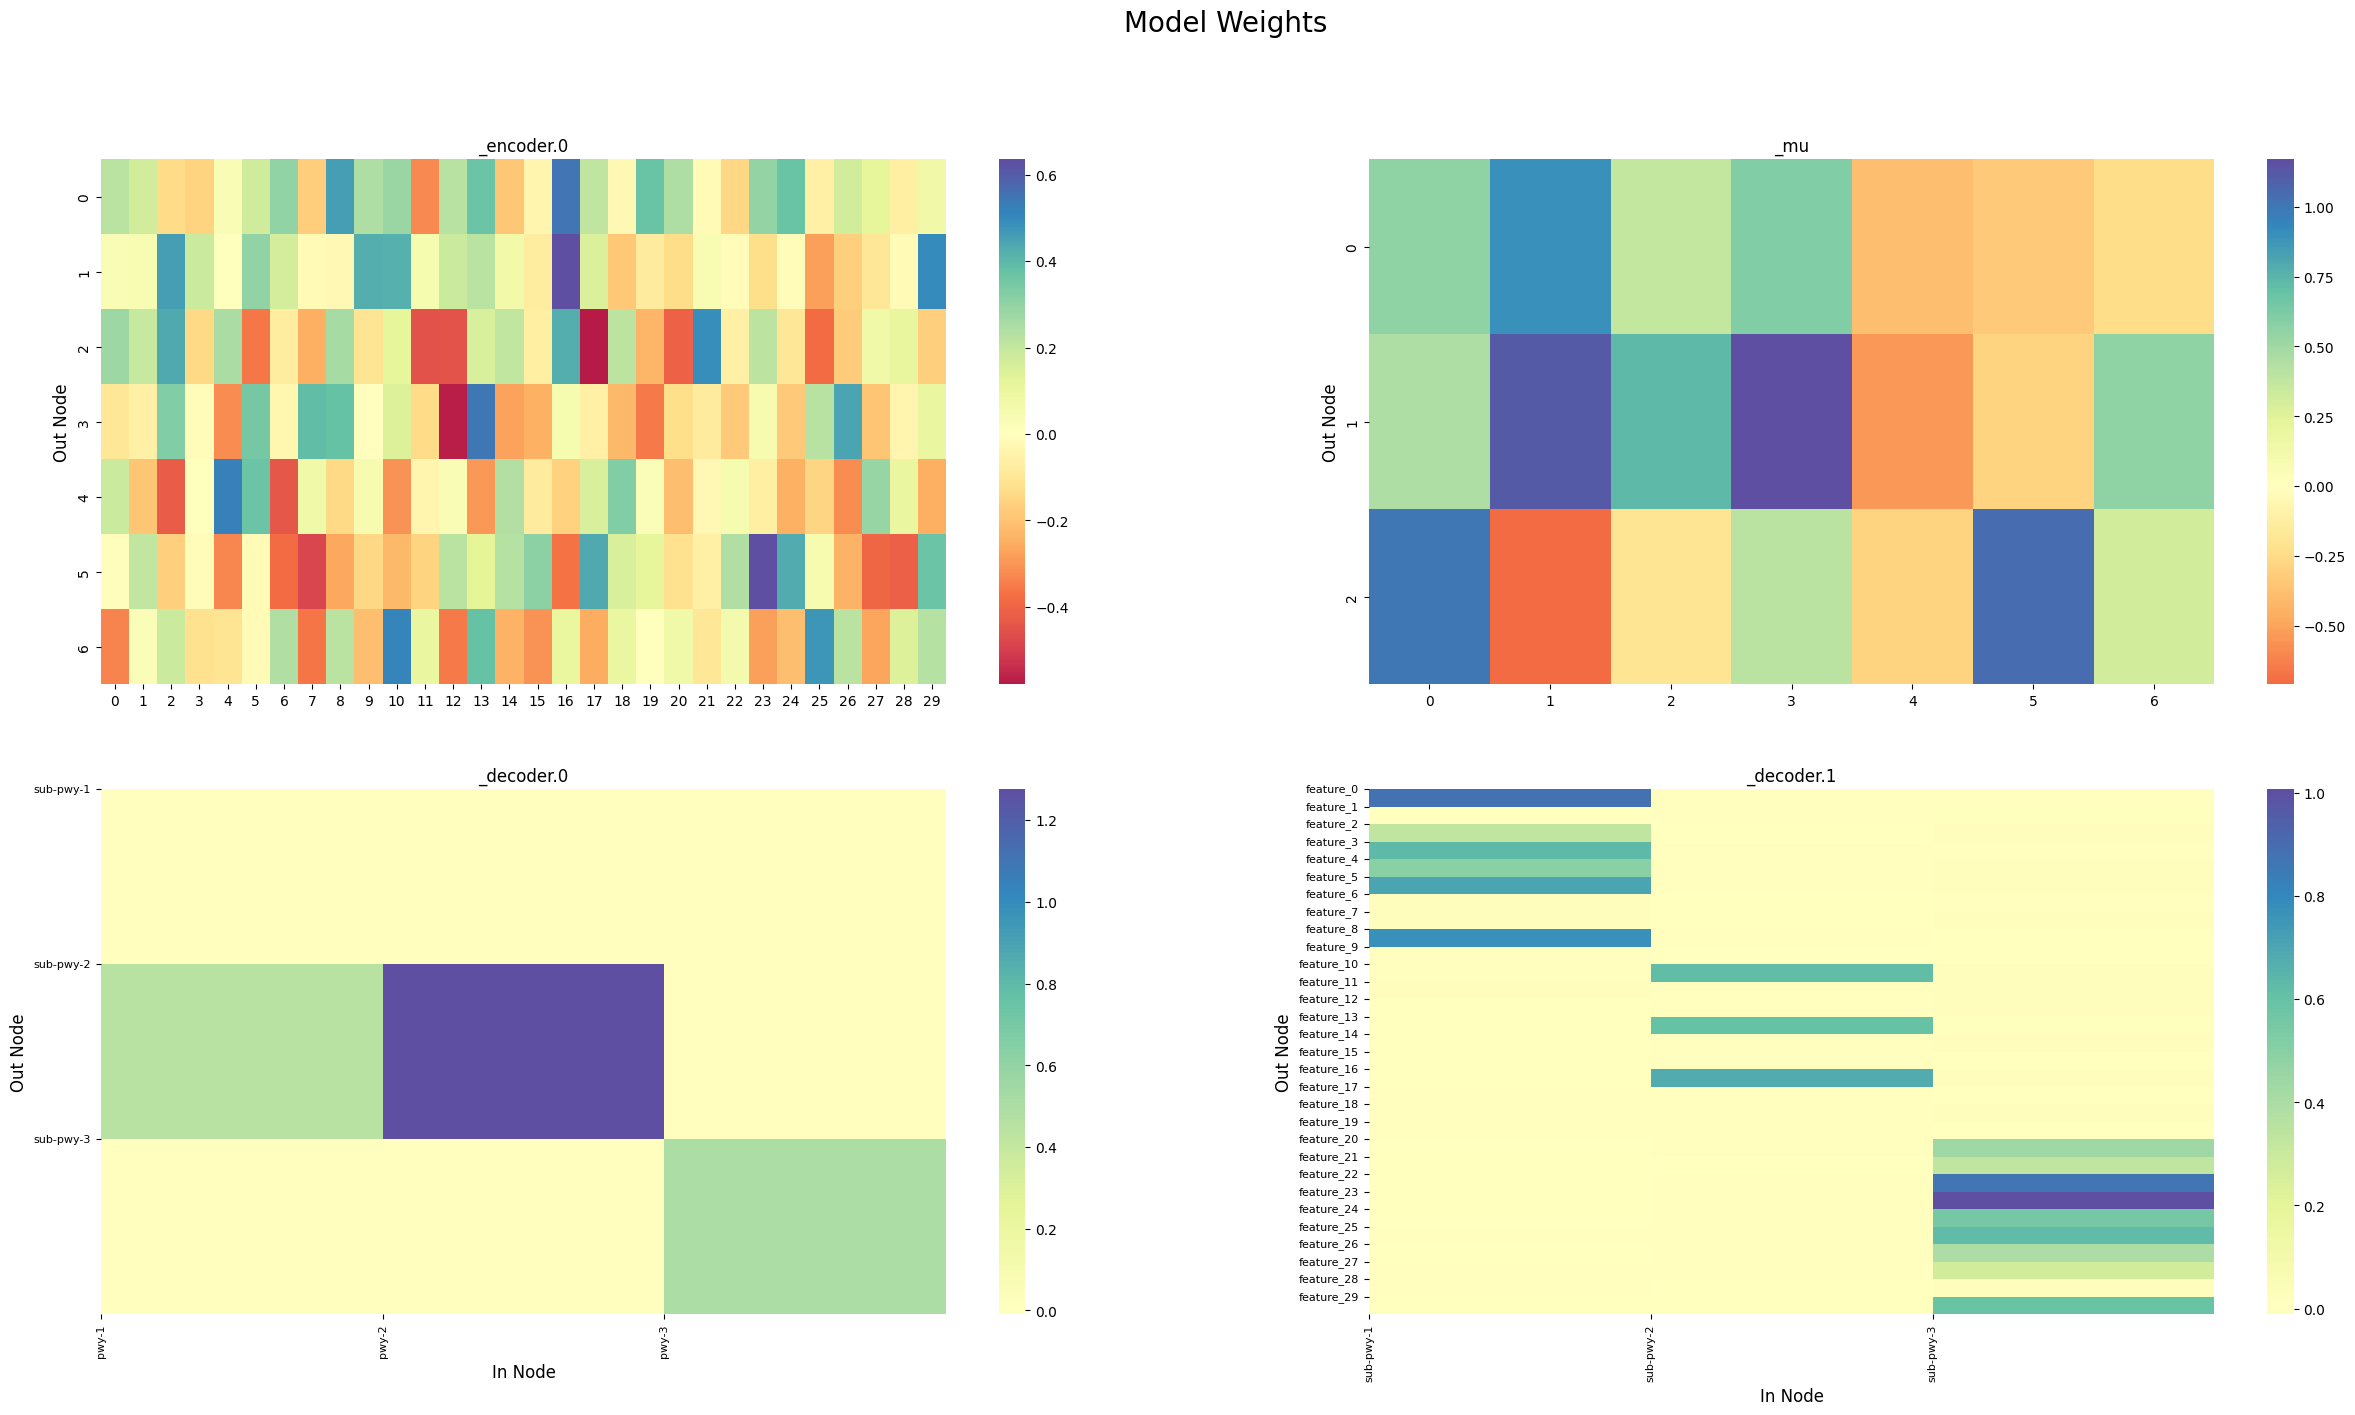

In [7]:
ontix._visualizer.show_weights()

Creating plots ...


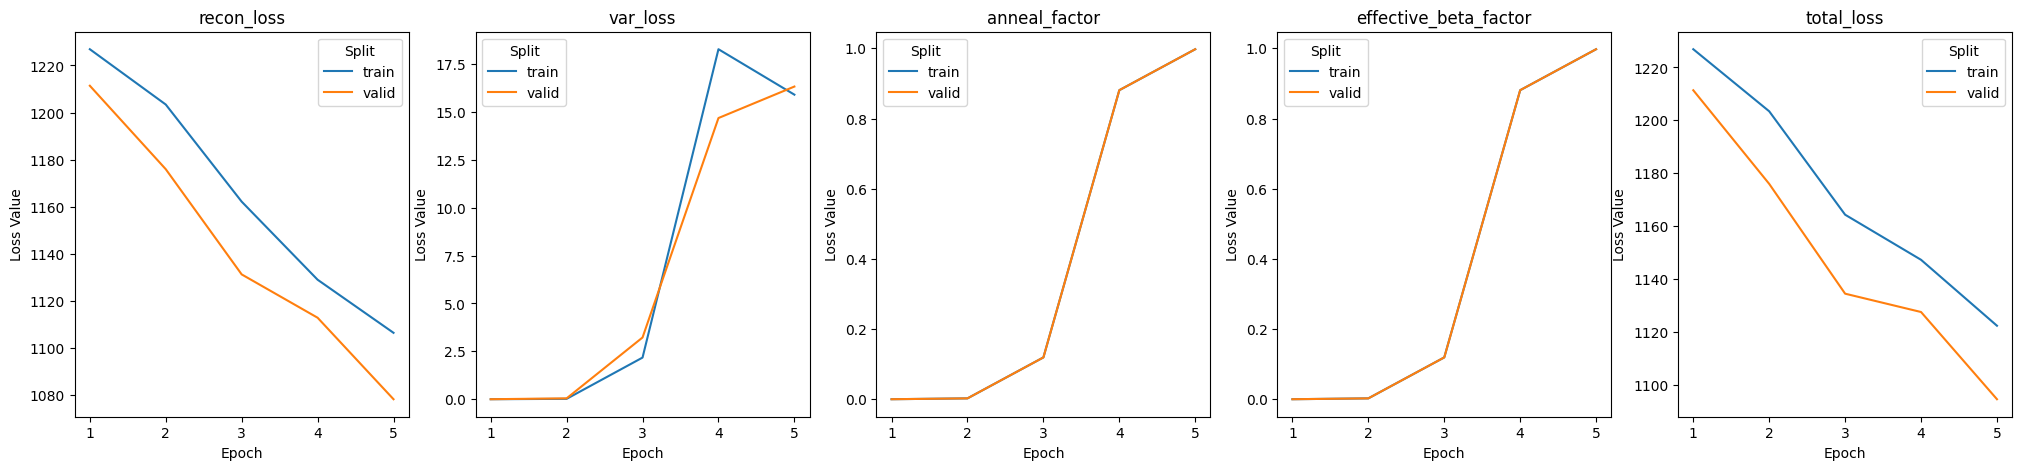

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_result.py:344: UserWarning: We could not create visualizations for the loss plots.
This usually happens if you try to visualize after saving and loading the pipeline object with `save_all=False`. This memory-efficient saving mode does not retain past training loss data.

Original error message: Shape of passed values is (0, 1), indices imply (0, 3)
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_result.py:344: UserWarning: We could not create visualizations for the loss plots.
This usually happens if you try to visualize after saving and loading the pipeline object with `save_all=False`. This memory-efficient saving mode does not retain past training loss data.

Original error message: Shape of passed values is (0, 1), indices imply (0, 3)
  warnings.warn(


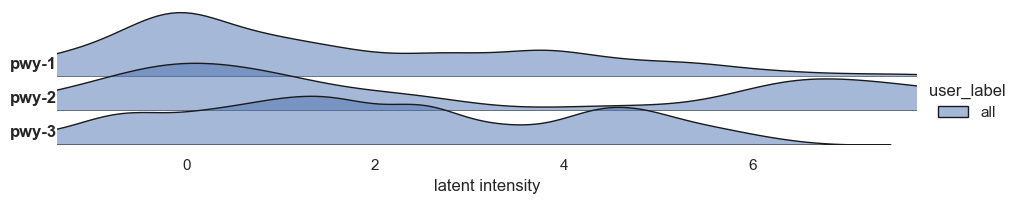

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_result.py:344: UserWarning: We could not create visualizations for the loss plots.
This usually happens if you try to visualize after saving and loading the pipeline object with `save_all=False`. This memory-efficient saving mode does not retain past training loss data.

Original error message: Shape of passed values is (0, 1), indices imply (0, 3)
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_result.py:344: UserWarning: We could not create visualizations for the loss plots.
This usually happens if you try to visualize after saving and loading the pipeline object with `save_all=False`. This memory-efficient saving mode does not retain past training loss data.

Original error message: Shape of passed values is (0, 1), indices imply (0, 3)
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


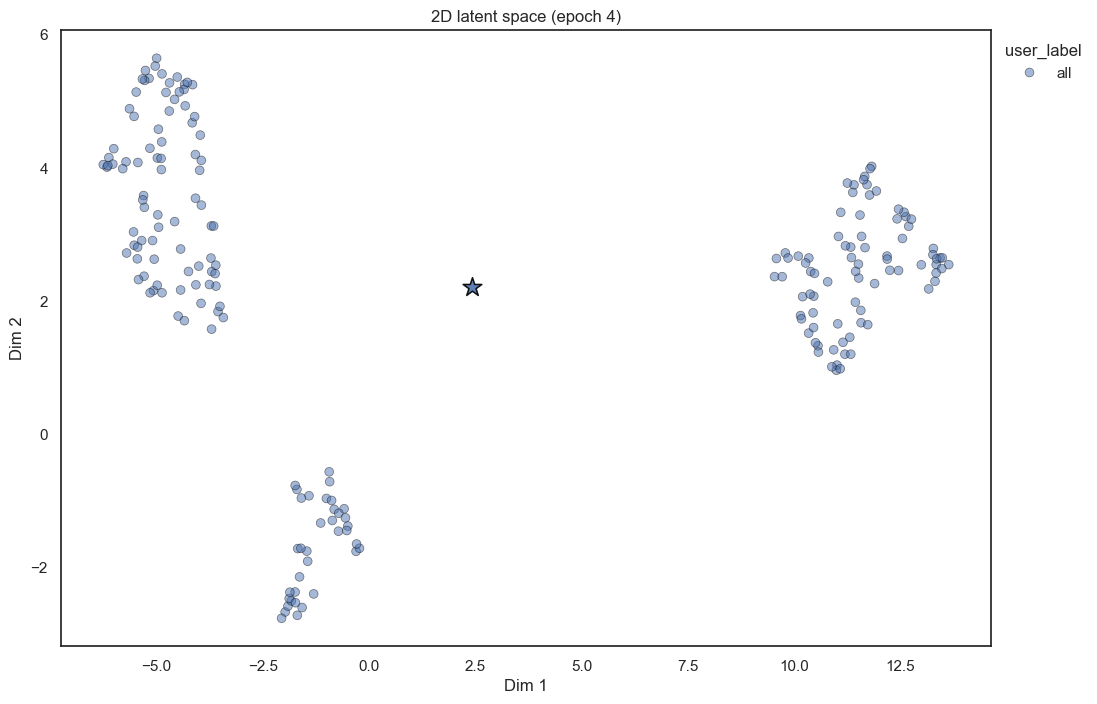

In [8]:
ontix.show_result()

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_result.py:344: UserWarning: We could not create visualizations for the loss plots.
This usually happens if you try to visualize after saving and loading the pipeline object with `save_all=False`. This memory-efficient saving mode does not retain past training loss data.

Original error message: Shape of passed values is (0, 1), indices imply (0, 3)
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_result.py:344: UserWarning: We could not create visualizations for the loss plots.
This usually happens if you try to visualize after saving and loading the pipeline object with `save_all=False`. This memory-efficient saving mode does not retain past training loss data.

Original error message: Shape of passed values is (0, 1), indices imply (0, 3)
  warnings.warn(


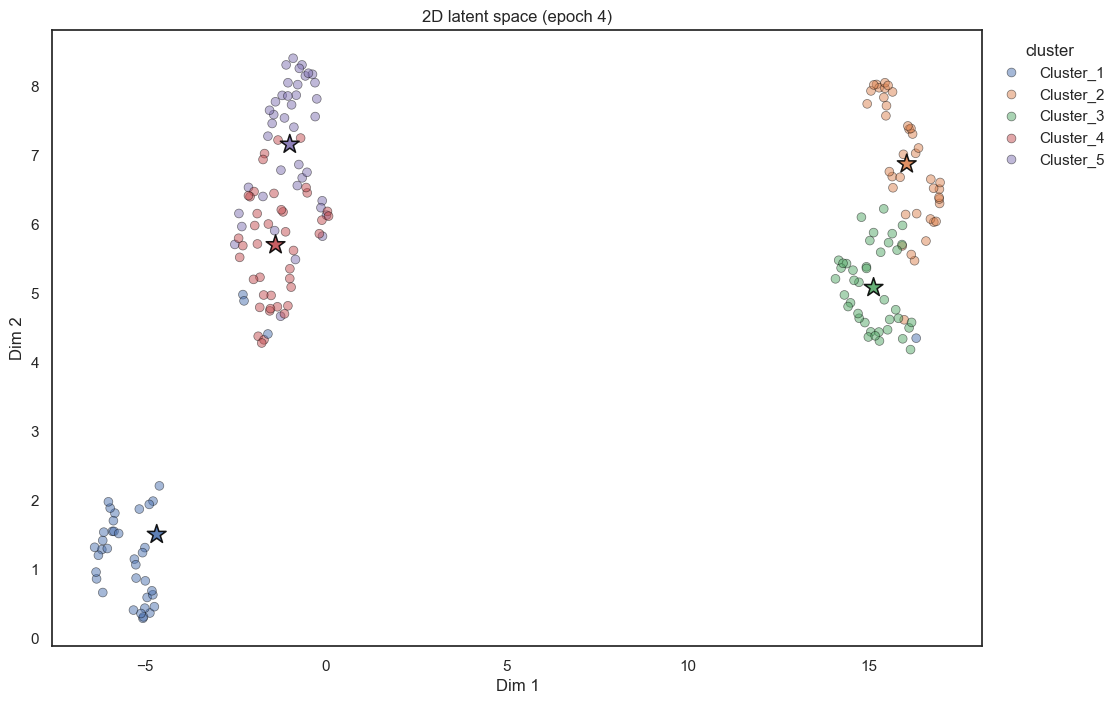

In [9]:
ontix._visualizer.show_latent_space(result=ontix.result,plot_type="2D-scatter", param=["cluster"])

/var/folders/5y/4yr_9t4x5zgf77_zw1krm4vw0000gn/T/ipykernel_98440/3884008002.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  sns.heatmap(np.array(mask), ax=axes[i], cmap="viridis")
/var/folders/5y/4yr_9t4x5zgf77_zw1krm4vw0000gn/T/ipykernel_98440/3884008002.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  sns.heatmap(np.array(mask), ax=axes[i], cmap="viridis")


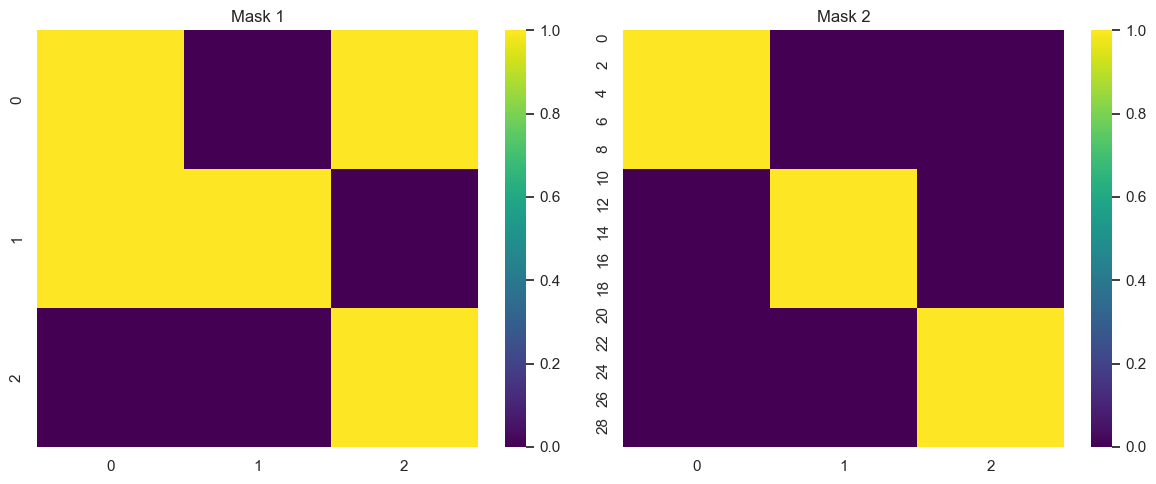

In [10]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

masks = ontix.result.model.masks

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, mask in enumerate(masks):
	sns.heatmap(np.array(mask), ax=axes[i], cmap="viridis")
	axes[i].set_title(f"Mask {i+1}")
plt.tight_layout()
plt.show()